In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
!unzip "/content/archive.zip" -d "/content"

Archive:  /content/archive.zip
  inflating: /content/train_u6lujuX_CVtuZ9i (1).csv  


In [ ]:
loan_dataset=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_dataset=loan_dataset.dropna()

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
#label encoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [ ]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
#replacing the 3+ with 4
loan_dataset.replace(to_replace='3+',value=4,inplace=True)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data visualization

<Axes: xlabel='Education', ylabel='count'>

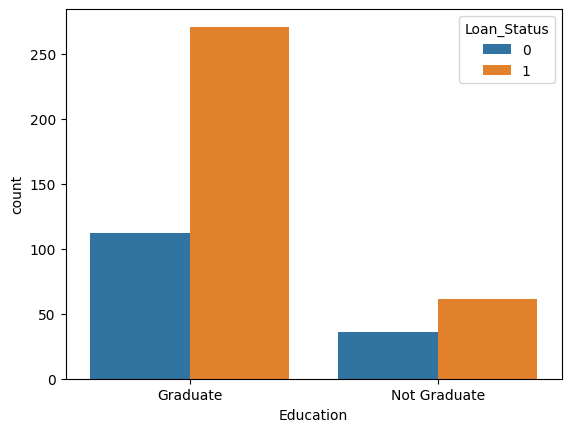

In [ ]:
#education and loan_status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

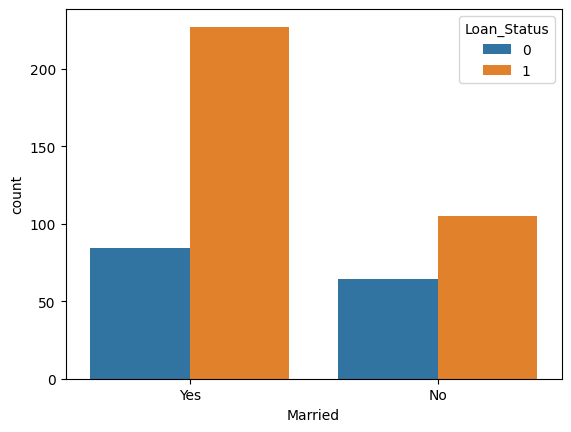

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Credit_History', ylabel='count'>

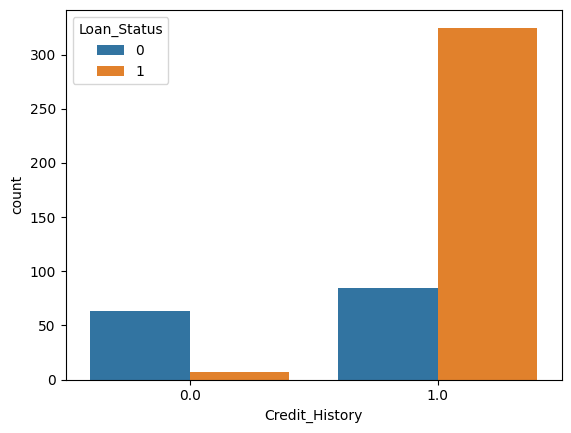

In [ ]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_dataset)

In [ ]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0}},inplace=True)

In [ ]:
loan_dataset.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
X=loan_dataset.drop(columns=['Loan_Status','Loan_ID'],axis=1)
Y=loan_dataset['Loan_Status']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.1,random_state=2)

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
X_train_pred=classifier.predict(X_train)
ac1=accuracy_score(X_train_pred,Y_train)
print(ac1)

0.7986111111111112


In [ ]:
X_test_pred=classifier.predict(X_test)
ac2=accuracy_score(X_test_pred,Y_test)
print(ac2)

0.8333333333333334


In [ ]:
#if ac1 > ac2 like ac1~78 and ac2~48 data is being overfitted